Here we look at [this dataset](https://catalog.data.gov/dataset/table-iii-deaths-in-122-u-s-cities)
from data.gov. It Imagine that your job is to create an executive summary of the dataset for President Obama as quickly as you can. Create a few plots for it showing a high level overview of the data with a sentence or two explaining each plot. Also create plots highlighting one or two insights in the data that you think are particularly interesting. For bonus points, create a simple interactive plot exploring some aspect of the data. Shoot for about an hour on this problem. Don’t worry too much about finer aesthetic points like colors or perfect axis labels, we’d rather see you finish quickly than slowly with perfect plots.


In [8]:
import matplotlib
matplotlib.use("Agg")

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook 

from IPython.display import Image
from pandas import *


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:
frame = pandas.read_csv('TABLE_III._Deaths_in_122_U.S._cities.csv')

In [10]:
frame.apply(lambda x: len(x.unique()))

Reporting Area                                  133
MMWR YEAR                                         1
MMWR WEEK                                        39
All causes, by age (years), All Ages**          757
All causes, by age (years), All Ages**, flag      3
All causes, by age (years), ≥65                 626
All causes, by age (years), ≥65, flag             3
All causes, by age (years), 45–64               386
All causes, by age (years), 45–64, flag           3
All causes, by age (years), 25–44               175
All causes, by age (years), 25–44, flag           3
All causes, by age (years), 1–24                 87
All causes, by age (years), 1–24, flag            3
All causes, by age (years), LT 1                 78
All causes, by age (years), LT 1, flag            3
P&I† Total                                      193
P&I† Total, flag                                  3
Location 1                                      125
Location 2                                        1
dtype: int64

In [4]:
len(frame)

5148

<IPython.core.display.Javascript object>


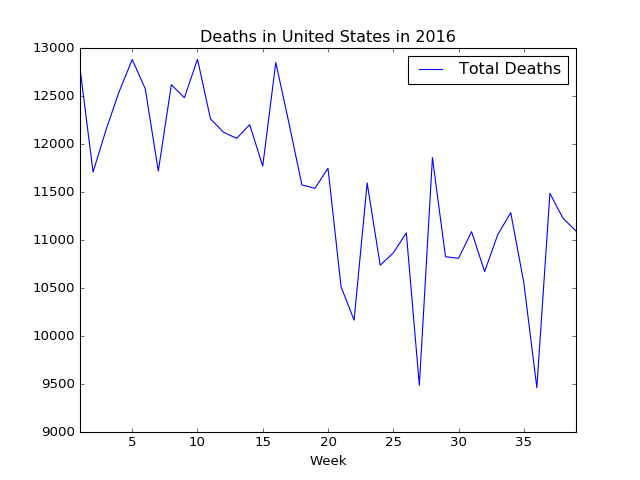

In [5]:
ne = frame[frame['Reporting Area']=='Total¶']

ne=ne.sort_values(['MMWR WEEK'], ascending=[True])
ne = ne[['MMWR WEEK','All causes, by age (years), All Ages**']]
ne.columns = ['Week','Total Deaths']

ne.set_index('Week').plot.line()
plt.title('Deaths in United States in 2016')

<IPython.core.display.Javascript object>


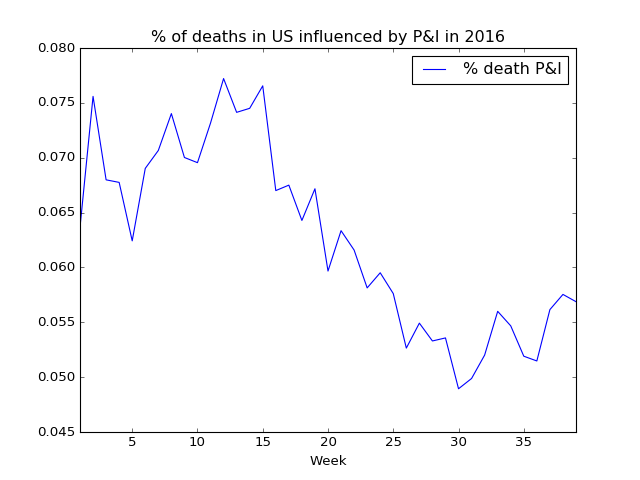

In [32]:
ne_p = frame[frame['Reporting Area']=='Total¶']

ne_p=ne_p.sort_values(['MMWR WEEK'], ascending=[True])
ne_p = ne_p[['MMWR WEEK','All causes, by age (years), All Ages**','P&I† Total']]
ne_p['% death P&I'] = ne_p['P&I† Total']/ne_p['All causes, by age (years), All Ages**']
ne_p = ne_p[['MMWR WEEK','% death P&I']]
ne_p.columns = ['Week','% death P&I']
ne_p
# plot.figure()
# plot.subplot(211)

ne_p.set_index('Week').plot.line()
# ply.set_ylabel("Percentage")
plt.title('% of deaths in US influenced by P&I in 2016')



# ne.columns = ['Week','Total Deaths']

# ne.set_index('Week').plot.line()
# plot.title('Deaths in United States')

The above chart shows that pneumonia/influenza had less of an impact on deaths in the United States as 2016 went on.

Next, we will be creating an interactive plot with the percentage of deaths involving pneumonia or influenza for each region of the United States.  First we make a list of dataframes for the regions.

In [6]:
regions = ['New England', 'Mid. Atlantic', 'E.N. Central', 'W.N. Central', 'S. Atlantic', 'E.S. Central', 'W.S. Central', 'Mountain', 'Pacific']

dfs = [frame[frame['Reporting Area']==zone] for zone in regions]

# plot.figure()
# plot.subplot()

for i in range(0,len(regions)):

    dfs[i] = dfs[i][['MMWR WEEK','All causes, by age (years), All Ages**','P&I† Total']]
    dfs[i]['% death P&I'] = dfs[i]['P&I† Total']/dfs[i]['All causes, by age (years), All Ages**']
    dfs[i] = dfs[i][['MMWR WEEK','% death P&I']]
    dfs[i].columns = ['Week','% death P&I']

#     dfs[i].set_index('Week').plot.line()
#     plot.title('% Deaths in ' + str(regions[i])  + ' influenced by P&I in 2016')




Now we make the plot.  Click on the region to add or remove it from the plot.

<IPython.core.display.Javascript object>


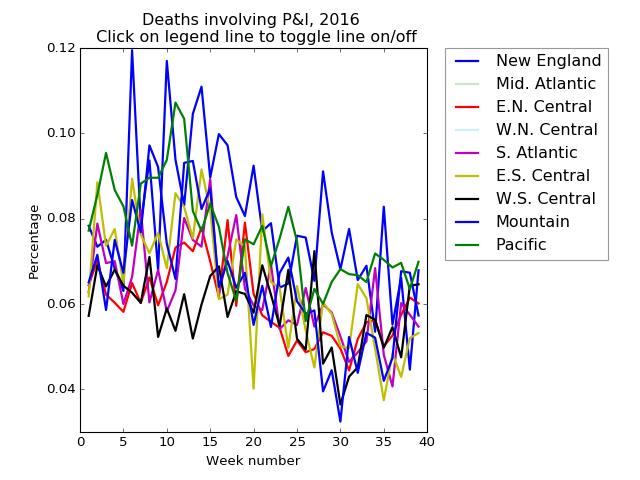

7

In [7]:
t = list(dfs[0]['Week'])

ys = list(dfs[i]['% death P&I'] for i in range(len(regions)))

fig, ax = plt.subplots(figsize=(8,6))


ax.set_title('Deaths involving P&I, 2016 \n Click on legend line to toggle line on/off')
ax.set_xlabel("Week number")
ax.set_ylabel("Percentage")

lines = [ax.plot(t, ys[i], lw=2, label=str(regions[i]))[0] for i in range(len(regions))]

# Shrink current axis by 30%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])


# leg = ax.legend(loc='right', fancybox=True, shadow=True)
leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
leg.get_frame().set_alpha(0.4)

# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line



lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)


The above chart indicates that pneumonia/influenza had less of an impact on deaths in each region of the United States as 2016 went on.  Futhermore, it appears that New England had the largest percentage of deaths involving pneumonia/influenza than any other region.
